In [1]:
import numpy as np 
import pandas as pd 

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

/kaggle/input/top-hits-spotify-from-20002019/songs_normalize.csv


In [2]:
df=pd.read_csv('/kaggle/input/top-hits-spotify-from-20002019/songs_normalize.csv')

In [3]:
# Display the first few rows of the dataset
print(df.head())

           artist                    song  duration_ms  explicit  year  \
0  Britney Spears  Oops!...I Did It Again       211160     False  2000   
1       blink-182    All The Small Things       167066     False  1999   
2      Faith Hill                 Breathe       250546     False  1999   
3        Bon Jovi            It's My Life       224493     False  2000   
4          *NSYNC             Bye Bye Bye       200560     False  2000   

   popularity  danceability  energy  key  loudness  mode  speechiness  \
0          77         0.751   0.834    1    -5.444     0       0.0437   
1          79         0.434   0.897    0    -4.918     1       0.0488   
2          66         0.529   0.496    7    -9.007     1       0.0290   
3          78         0.551   0.913    0    -4.063     0       0.0466   
4          65         0.614   0.928    8    -4.806     0       0.0516   

   acousticness  instrumentalness  liveness  valence    tempo         genre  
0        0.3000          0.000018    0

In [4]:
# Description of the Data
df.describe()

,duration_ms,year,popularity,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo
count,2000.000000,2000.00000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000
mean,228748.124500,2009.49400,59.872500,0.667438,0.720366,5.378000,-5.512434,0.553500,0.103568,0.128955,0.015226,0.181216,0.551690,120.122558
std,39136.569008,5.85996,21.335577,0.140416,0.152745,3.615059,1.933482,0.497254,0.096159,0.173346,0.087771,0.140669,0.220864,26.967112
min,113000.000000,1998.00000,0.000000,0.129000,0.054900,0.000000,-20.514000,0.000000,0.023200,0.000019,0.000000,0.021500,0.038100,60.019000
25%,203580.000000,2004.00000,56.000000,0.581000,0.622000,2.000000,-6.490250,0.000000,0.039600,0.014000,0.000000,0.088100,0.386750,98.985750
50%,223279.500000,2010.00000,65.500000,0.676000,0.736000,6.000000,-5.285000,1.000000,0.059850,0.055700,0.000000,0.124000,0.557500,120.021500
75%,248133.000000,2015.00000,73.000000,0.764000,0.839000,8.000000,-4.167750,1.000000,0.129000,0.176250,0.000068,0.241000,0.730000,134.265500
max,484146.000000,2020.00000,89.000000,0.975000,0.999000,11.000000,-0.276000,1.000000,0.576000,0.976000,0.985000,0.853000,0.973000,210.851000


In [5]:
# Get information about columns, data types, and missing values
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 18 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   artist            2000 non-null   object 
 1   song              2000 non-null   object 
 2   duration_ms       2000 non-null   int64  
 3   explicit          2000 non-null   bool   
 4   year              2000 non-null   int64  
 5   popularity        2000 non-null   int64  
 6   danceability      2000 non-null   float64
 7   energy            2000 non-null   float64
 8   key               2000 non-null   int64  
 9   loudness          2000 non-null   float64
 10  mode              2000 non-null   int64  
 11  speechiness       2000 non-null   float64
 12  acousticness      2000 non-null   float64
 13  instrumentalness  2000 non-null   float64
 14  liveness          2000 non-null   float64
 15  valence           2000 non-null   float64
 16  tempo             2000 non-null   float64


In [6]:
# Count the number of missing values in each column
missing_values = df.isnull().sum()
print(missing_values)

artist              0
song                0
duration_ms         0
explicit            0
year                0
popularity          0
danceability        0
energy              0
key                 0
loudness            0
mode                0
speechiness         0
acousticness        0
instrumentalness    0
liveness            0
valence             0
tempo               0
genre               0
dtype: int64


In [7]:
# Check for duplicate rows
df.duplicated().value_counts()

False    1941
True       59
dtype: int64

In [8]:
# Drop all duplicates
df.drop_duplicates(inplace=True)

/opt/conda/lib/python3.10/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.5
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"
/tmp/ipykernel_20/3960176045.py:5: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = df.corr()


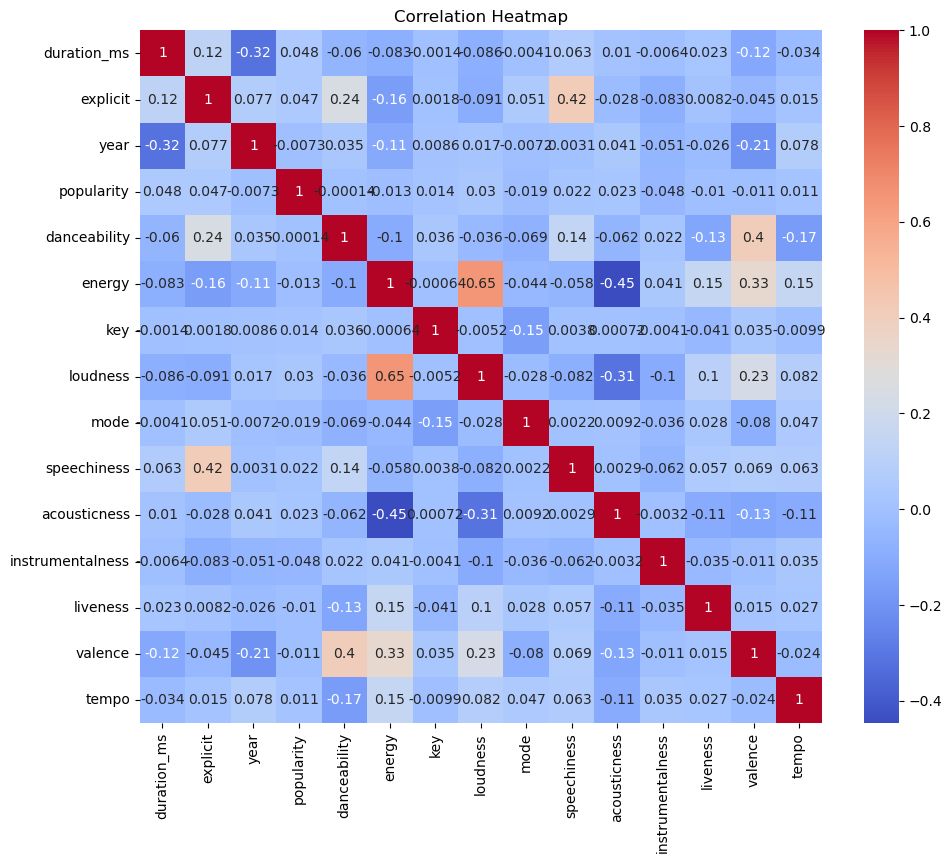

In [9]:
import seaborn as sns
import matplotlib.pyplot as plt

# Calculate your correlation matrix 
correlation_matrix = df.corr()

# Create a heatmap using Seaborn
plt.figure(figsize=(11,9))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()

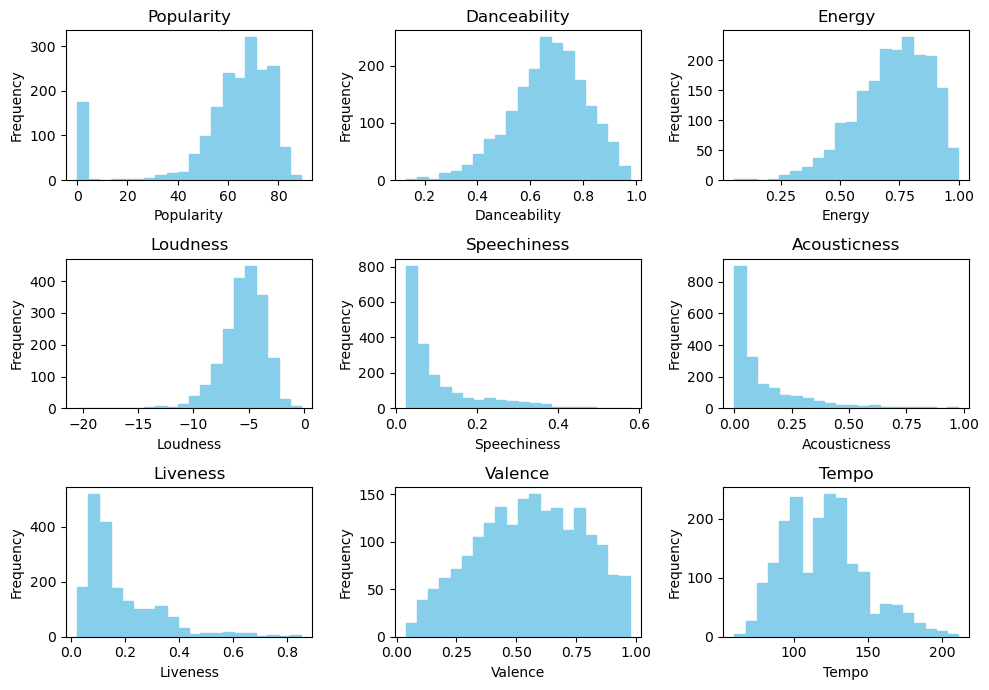

In [10]:
import matplotlib.pyplot as plt

# Create subplots
fig, axes = plt.subplots(nrows=3, ncols=3, figsize=(10, 7))
plt.subplots_adjust(wspace=0.3, hspace=0.5)

# Plot histograms for each attribute
attributes = ['popularity', 'danceability', 'energy', 'loudness', 'speechiness', 'acousticness', 'liveness', 'valence', 'tempo']

for i, attr in enumerate(attributes):
    row = i // 3
    col = i % 3
    
    axes[row, col].hist(df[attr], bins=20, color='skyblue', edgecolor='skyblue')
    axes[row, col].set_title(attr.capitalize())
    axes[row, col].set_xlabel(attr.capitalize())
    axes[row, col].set_ylabel('Frequency')

plt.tight_layout()
plt.show()


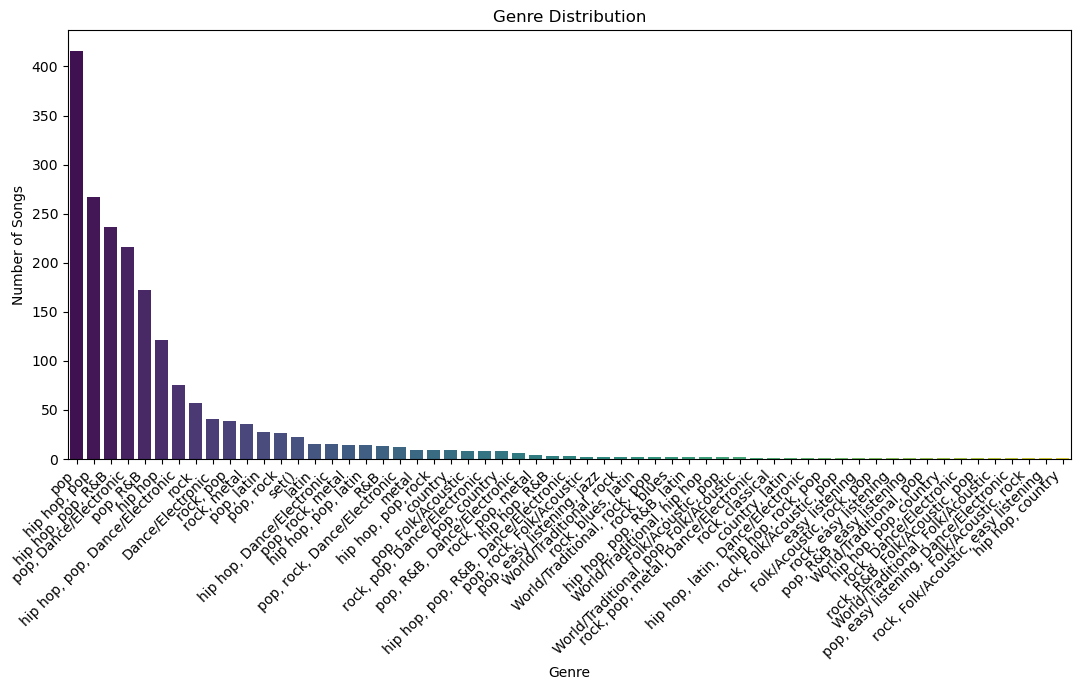

In [11]:
plt.figure(figsize=(11, 7))
genre_counts = df['genre'].value_counts()
sns.barplot(x=genre_counts.index, y=genre_counts.values, palette='viridis')
plt.xticks(rotation=45, ha='right')
plt.xlabel('Genre')
plt.ylabel('Number of Songs')
plt.title('Genre Distribution')
plt.tight_layout()
plt.show()

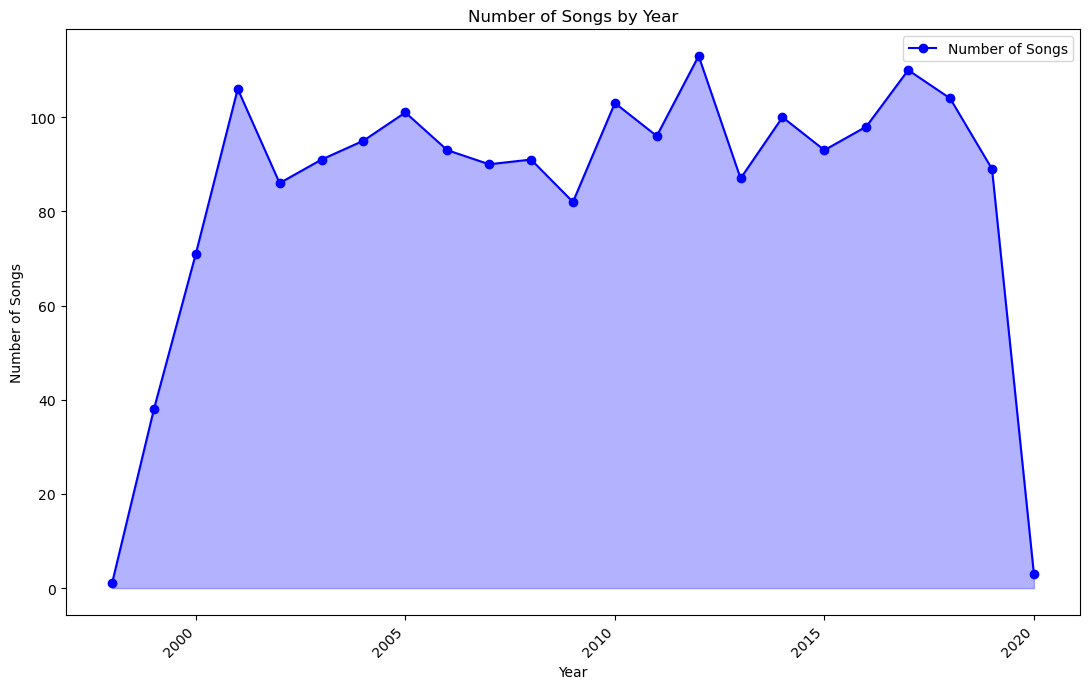

In [12]:
plt.figure(figsize=(11, 7))
year_counts = df['year'].value_counts().sort_index()  # Sort by year

plt.plot(year_counts.index, year_counts.values, marker='o', color='b', label='Number of Songs')
plt.fill_between(year_counts.index, year_counts.values, color='blue', alpha=0.3)

plt.xticks(rotation=45, ha='right')
plt.xlabel('Year')
plt.ylabel('Number of Songs')
plt.title('Number of Songs by Year')
plt.legend()
plt.tight_layout()
plt.show()



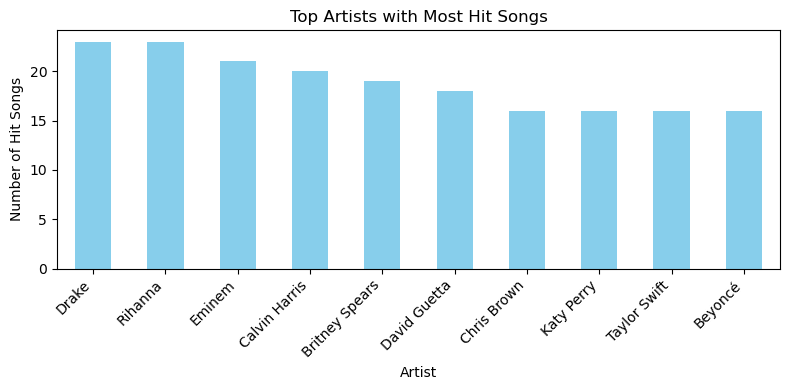

In [13]:
# The top artists with the most hit songs
top_artists = df['artist'].value_counts().head(10)


plt.figure(figsize=(8, 4))
top_artists.plot(kind='bar', color='skyblue')
plt.xlabel('Artist')
plt.ylabel('Number of Hit Songs')
plt.title('Top Artists with Most Hit Songs')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()


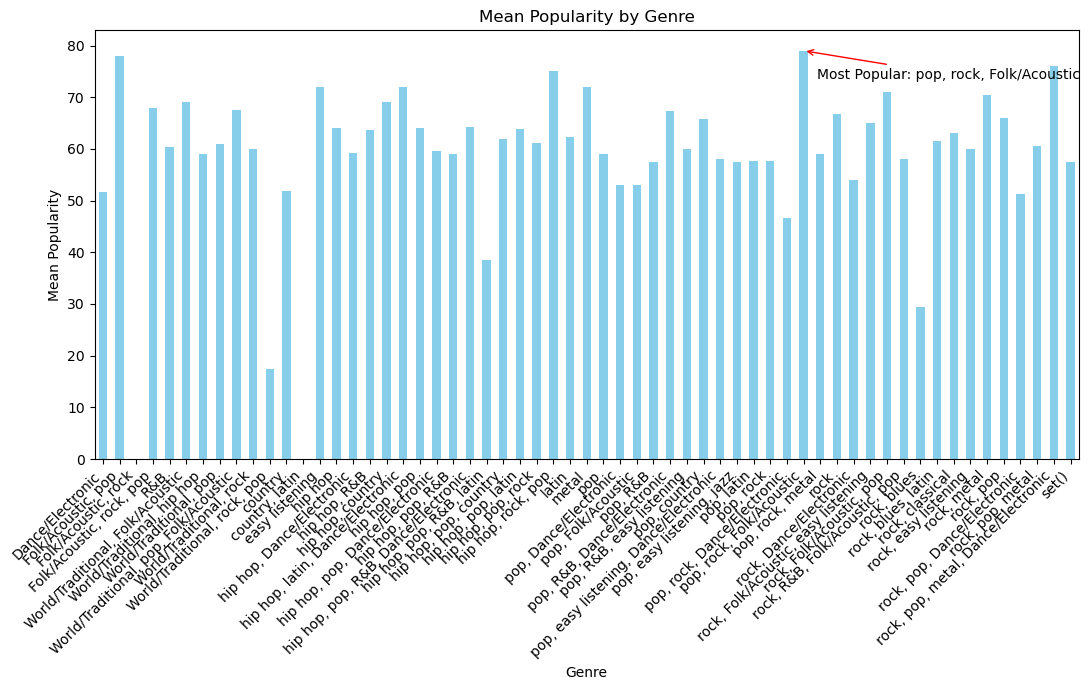

In [14]:
genre_popularity = df.groupby('genre')['popularity'].mean()

# Find the most popular genre
most_popular_genre = genre_popularity.idxmax()

plt.figure(figsize=(11, 7))
genre_popularity.plot(kind='bar', color='skyblue')
plt.xlabel('Genre')
plt.ylabel('Mean Popularity')
plt.title('Mean Popularity by Genre')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()

# Annotate the most popular genre
plt.annotate(f'Most Popular: {most_popular_genre}', 
             xy=(genre_popularity.index.get_loc(most_popular_genre), genre_popularity[most_popular_genre]),
             xytext=(10, -20),
             textcoords='offset points',
             arrowprops=dict(arrowstyle='->', color='red'))

plt.show()


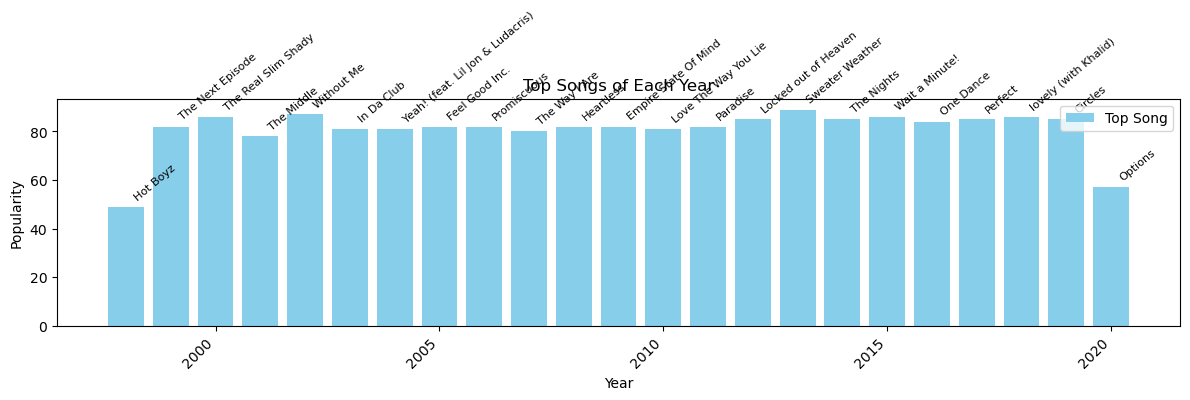

In [15]:
# Group the DataFrame by year and get the top song for each year based on popularity
top_song_by_year = df.groupby('year').apply(lambda group: group.nlargest(1, 'popularity')).reset_index(drop=True)

# Create a grouped bar chart with song names to visualize the popularity of the top songs for each year
plt.figure(figsize=(12, 4))
plt.bar(top_song_by_year['year'], top_song_by_year['popularity'], color='skyblue', label='Top Song')
plt.xlabel('Year')
plt.ylabel('Popularity')
plt.title('Top Songs of Each Year')
plt.legend()
plt.xticks(rotation=45, ha='right')

# Annotate each bar with the name of the top song
for i, row in top_song_by_year.iterrows():
    plt.annotate(row['song'], xy=(row['year'], row['popularity']), xytext=(5, 5),
                 textcoords='offset points', fontsize=8, rotation=40)

plt.tight_layout()

plt.show()


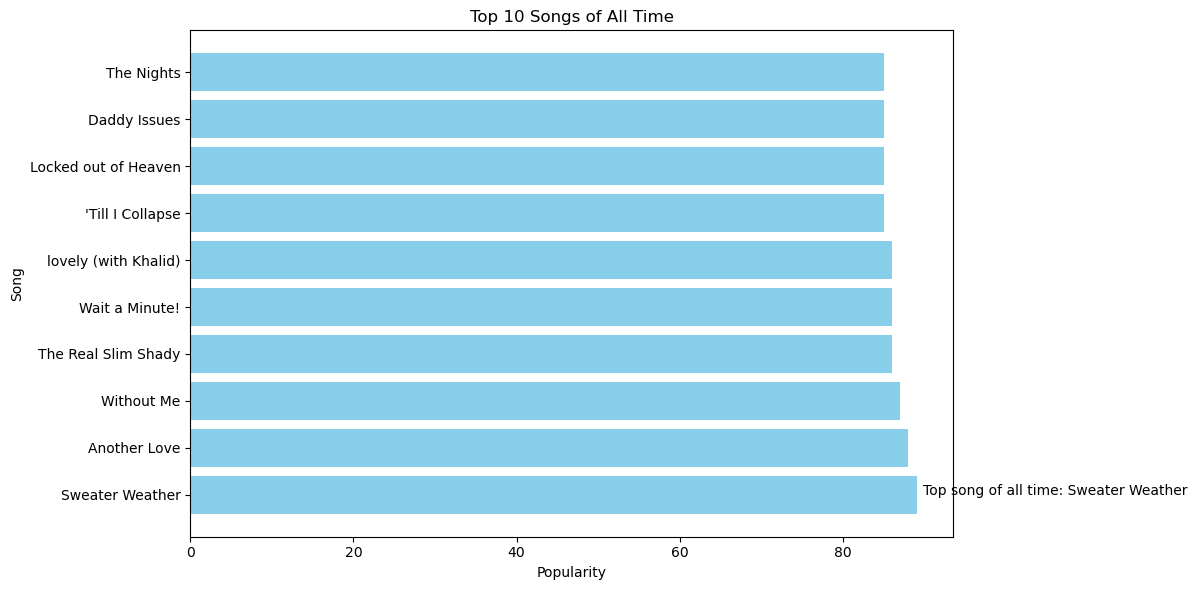

In [16]:
top_10_songs = df.nlargest(10, 'popularity')

# Create a bar chart to visualize the popularity of the top 10 songs of all time
plt.figure(figsize=(12, 6))
plt.barh(top_10_songs['song'], top_10_songs['popularity'], color='skyblue')
plt.xlabel('Popularity')
plt.ylabel('Song')
plt.title('Top 10 Songs of All Time')
top_song = top_10_songs.iloc[0]
plt.annotate(f"Top song of all time: {top_song['song']}", 
             xy=(top_song['popularity'], top_song['song']),
             xytext=(5, 0),
             textcoords='offset points')
plt.tight_layout()

plt.show()


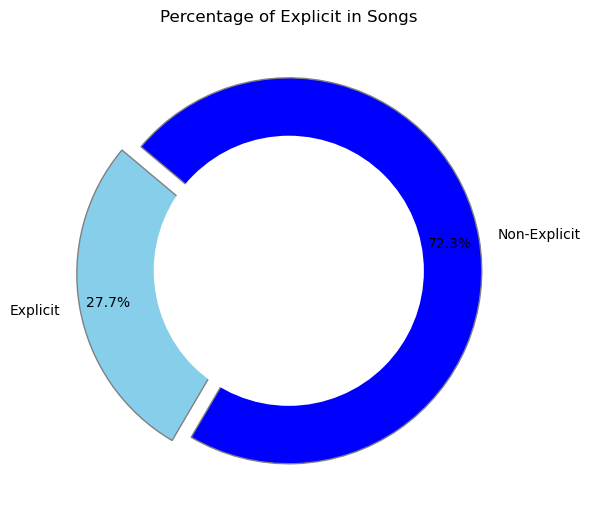

In [17]:

explicit_percentage = (df['explicit'].sum() / len(df)) * 100
non_explicit_percentage = 100 - explicit_percentage
labels = ['Explicit', 'Non-Explicit']
sizes = [explicit_percentage, non_explicit_percentage]
colors = ['skyblue', 'blue']
explode = (0.1, 0) 

plt.figure(figsize=(6, 6))
plt.pie(sizes, labels=labels, colors=colors, autopct='%1.1f%%', startangle=140, pctdistance=0.85,
        wedgeprops={'edgecolor': 'gray'}, explode=explode)
plt.title('Percentage of Explicit in Songs')
plt.tight_layout()

centre_circle = plt.Circle((0,0),0.70,fc='white')
fig = plt.gcf()
fig.gca().add_artist(centre_circle)

plt.show()



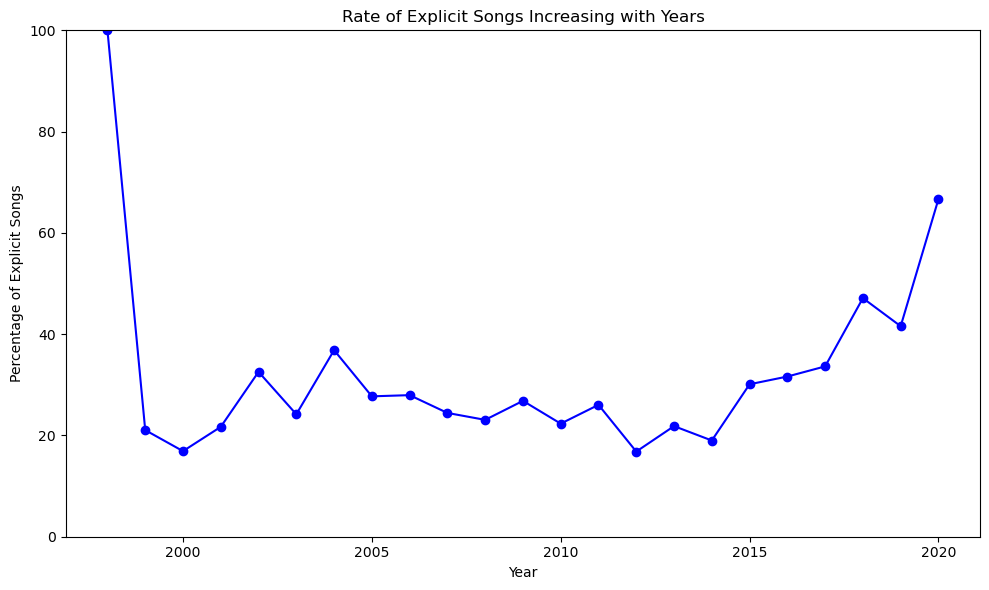

In [18]:
explicit_percentage_by_year = df.groupby('year')['explicit'].mean() * 100
plt.figure(figsize=(10, 6))
plt.plot(explicit_percentage_by_year.index, explicit_percentage_by_year.values, marker='o', color='b')
plt.xlabel('Year')
plt.ylabel('Percentage of Explicit Songs')
plt.title('Rate of Explicit Songs Increasing with Years')
plt.ylim(0, 100)
plt.tight_layout()

plt.show()


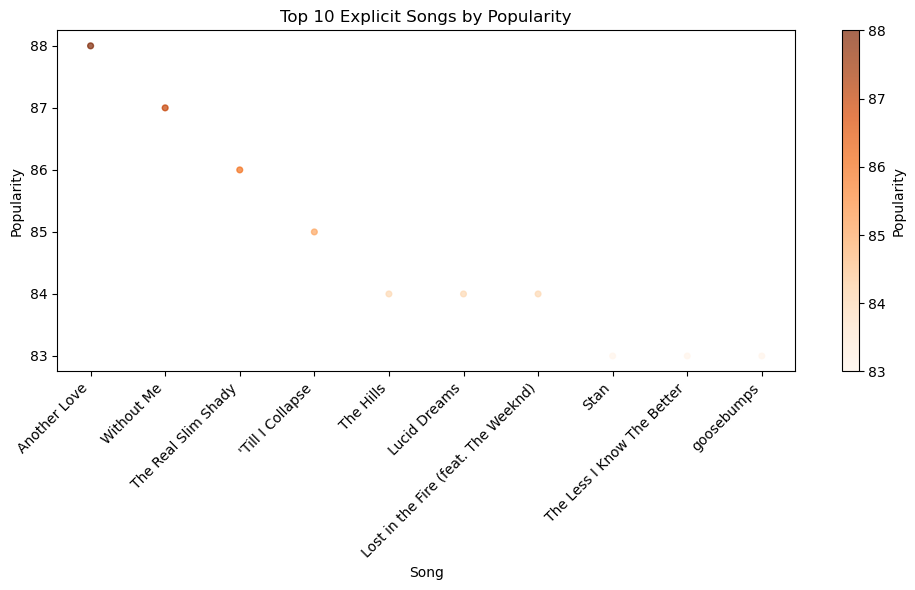

In [19]:
top_explicit_songs = df[df['explicit'] == 1].nlargest(10, 'popularity')
plt.figure(figsize=(10, 6))
plt.scatter(top_explicit_songs['song'], top_explicit_songs['popularity'], s=top_explicit_songs['popularity']*0.2,
            c=top_explicit_songs['popularity'], cmap='Oranges', alpha=0.7)
plt.xlabel('Song')
plt.ylabel('Popularity')
plt.title('Top 10 Explicit Songs by Popularity')
plt.colorbar(label='Popularity')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()

plt.show()


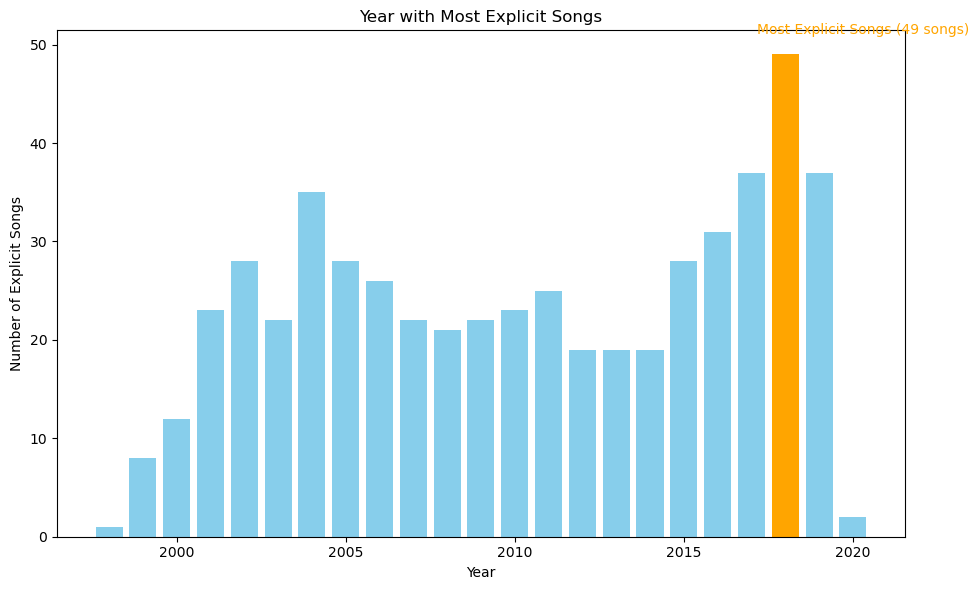

In [20]:
explicit_counts_by_year = df.groupby('year')['explicit'].sum()
year_with_most_explicit = explicit_counts_by_year.idxmax()
most_explicit_count = explicit_counts_by_year.max()
plt.figure(figsize=(10, 6))
plt.bar(explicit_counts_by_year.index, explicit_counts_by_year.values, color='skyblue')
plt.bar(year_with_most_explicit, most_explicit_count, color='orange')
plt.xlabel('Year')
plt.ylabel('Number of Explicit Songs')
plt.title('Year with Most Explicit Songs')
plt.annotate(f'Most Explicit Songs ({most_explicit_count} songs)', 
             xy=(year_with_most_explicit, most_explicit_count), xytext=(-20, 15),
             textcoords='offset points', color='orange')
plt.tight_layout()

plt.show()


**Conclusion**

*Top 3 songs of all time:*

* Sweater weaether
* Another love 
* Without me 

*Top artist of all time:*

* Rihanna 
* Drake 

*Most popular genre:*

Pop, rock, folk/acoustic 
